<a href="https://colab.research.google.com/github/elva4012/Case-Study1/blob/master/Case_Study_8_Predicting_Engagement_What_drives_ad_performance%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicting Engagement- What drives ad performance?**

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
file_name= "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/bank-full.csv"
bank=pd.read_csv(file_name, sep=';')

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Let's see a summary of our dataframe

In [6]:
print ("Rows     : " , bank.shape[0])
print ("Columns  : " , bank.shape[1])
print ("\nFeatures : \n" , bank.columns.tolist())
print ("\nMissing values :  ", bank.isnull().sum().values.sum())
print ("\nUnique values :  \n",bank.nunique())

Rows     :  45211
Columns  :  17

Features : 
 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Missing values :   0

Unique values :  
 age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


In [7]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
# Here we use the apply funtion to transform 'y' from yes or no to 0s and 1s

bank['converted']=bank['y'].apply(lambda x: 0 if x=='no' else 1)

del bank['y']

bank.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,converted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


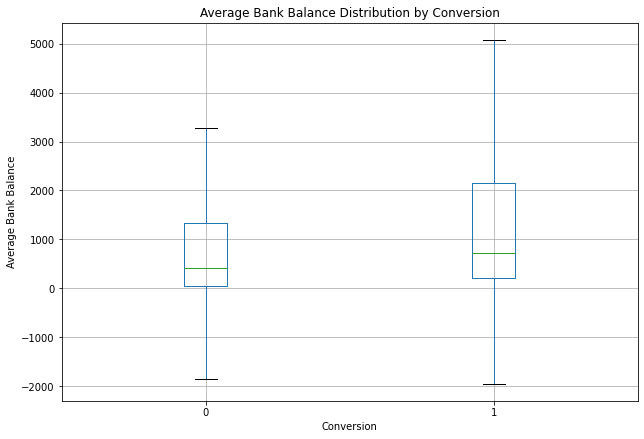

In [10]:
# Let's visualize how our output variable (converted) changes with different incomes

ax=bank[['converted', 'balance']].boxplot(by='converted', showfliers=False, figsize= (10,7 ))  # Or showfliers=True

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distribution by Conversion')

plt.suptitle("")
plt.show()

In [11]:
# Let's do the same with using violin plots
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


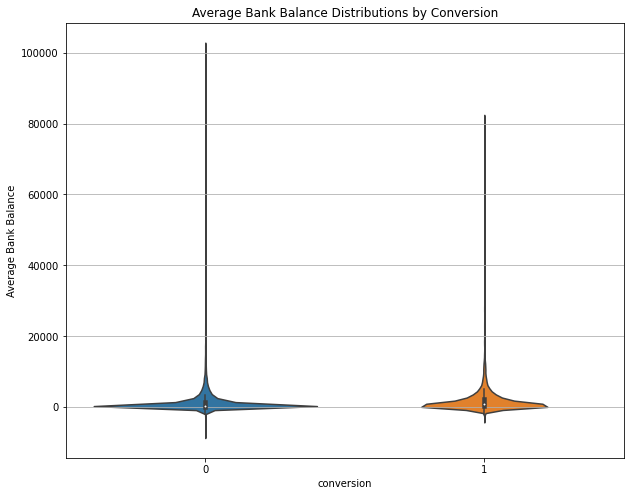

In [12]:
fontsize=10

fig, axes=plt.subplots()

fig.set_size_inches(10,8)

sns.violinplot('converted', 'balance', data=bank, ax=axes)
axes.set_title('Average Bank Balance Distributions by Conversion')

axes.yaxis.grid(True)
axes.set_xlabel('conversion')
axes.set_ylabel('Average Bank Balance')

plt.show()

This violin didn't tell too much information, we still want to see more. 

## **Let's see the marketing campaigns**

In [13]:
bank['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [14]:
# Conversion rate by campaign

Conversion_by_contacts=bank.groupby('campaign')['converted'].sum()/bank.groupby('campaign')['converted'].count()*100

# Let's see the top ten campaigns in terms of % converted

Conversion_by_contacts.head()

campaign
1    14.597583
2    11.203519
3    11.193624
4     9.000568
5     7.879819
Name: converted, dtype: float64

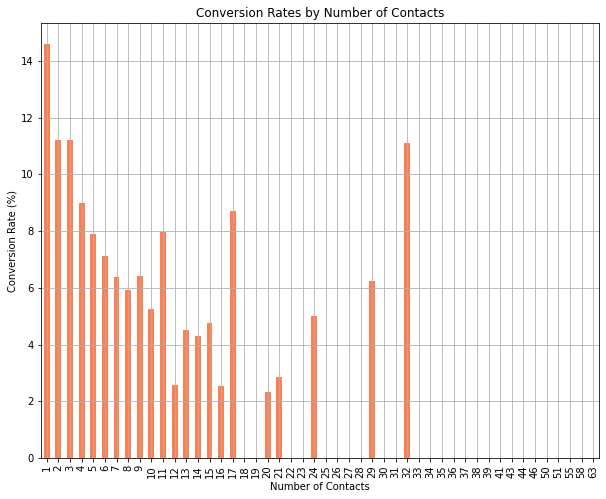

In [15]:
ax=Conversion_by_contacts.plot(
    kind='bar',
    figsize=(10,8),
    title='Conversion Rates by Number of Contacts',
    grid=True,
    color='coral'
)

ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Conversion Rate (%)')

plt.show()

The # of contacts increase, the conversion rate decreases

## Converstion rate by job

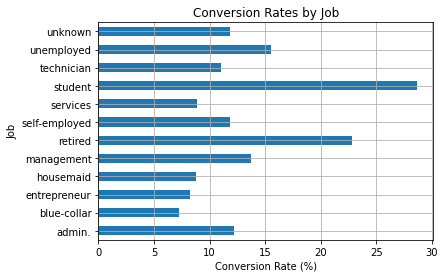

In [16]:
Conversion_by_job=bank.groupby('job')['converted'].sum()/bank.groupby('job')['converted'].count()*100

ax=Conversion_by_job.plot(
    kind='barh',
    grid=True,
    title='Conversion Rates by Job'
)

ax.set_xlabel('Conversion Rate (%)')
ax.set_ylabel('Job')

plt.show()

In [17]:
# View the number of unique elements in each feature

bank.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
converted       2
dtype: int64

# Get our category type columns

In [18]:


cols=bank.columns
num_cols=bank._get_numeric_data().columns
cat_cols=list(set(cols)-set(num_cols))
cat_cols

['loan',
 'month',
 'poutcome',
 'education',
 'contact',
 'job',
 'marital',
 'default',
 'housing']

Here are total 9 categories

# **We need to encode our cateogorical varaibles**


##1. Encoding **month**

In [19]:
# Starting with month first
bank['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [20]:
bank.groupby('month').count()['converted']

month
apr     2932
aug     6247
dec      214
feb     2649
jan     1403
jul     6895
jun     5341
mar      477
may    13766
nov     3970
oct      738
sep      579
Name: converted, dtype: int64

In [21]:
months=['jan', 'feb', 'may', 'mar', 'apr', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

bank['month']=bank['month'].apply(lambda x: months.index(x) +1)

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,converted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,3,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,3,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,3,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,3,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,3,198,1,-1,0,unknown,0


## 2. Encoding **jobs**

In [22]:
bank['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [23]:
bank=pd.get_dummies(data=bank, columns=['job'])
bank.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,converted,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,married,tertiary,no,2143,yes,no,unknown,5,3,261,1,-1,0,unknown,0,0,0,0,0,1,0,0,0,0,0,0,0
1,44,single,secondary,no,29,yes,no,unknown,5,3,151,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,1,0,0
2,33,married,secondary,no,2,yes,yes,unknown,5,3,76,1,-1,0,unknown,0,0,0,1,0,0,0,0,0,0,0,0,0
3,47,married,unknown,no,1506,yes,no,unknown,5,3,92,1,-1,0,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0
4,33,single,unknown,no,1,no,no,unknown,5,3,198,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,0,0,1


## 3. Encoding **marital**

In [24]:
bank=pd.get_dummies(data=bank, columns=['marital'])
bank.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,converted,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,tertiary,no,2143,yes,no,unknown,5,3,261,1,-1,0,unknown,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,44,secondary,no,29,yes,no,unknown,5,3,151,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,33,secondary,no,2,yes,yes,unknown,5,3,76,1,-1,0,unknown,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,47,unknown,no,1506,yes,no,unknown,5,3,92,1,-1,0,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,33,unknown,no,1,no,no,unknown,5,3,198,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


## 4. Encoding **housing**


In [25]:
bank['housing'].unique()

array(['yes', 'no'], dtype=object)

In [26]:
bank['housing']=bank['housing'].map(lambda s :1 if s =='yes' else 0)
bank.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,converted,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,tertiary,no,2143,1,no,unknown,5,3,261,1,-1,0,unknown,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,44,secondary,no,29,1,no,unknown,5,3,151,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,33,secondary,no,2,1,yes,unknown,5,3,76,1,-1,0,unknown,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,47,unknown,no,1506,1,no,unknown,5,3,92,1,-1,0,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,33,unknown,no,1,0,no,unknown,5,3,198,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


## 5. Encoding **loans**

In [27]:
bank['loan'].unique()

array(['no', 'yes'], dtype=object)

In [28]:
bank['loan']=bank['loan'].map(lambda s :1 if s =='yes' else 0)
bank.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,converted,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,tertiary,no,2143,1,0,unknown,5,3,261,1,-1,0,unknown,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,44,secondary,no,29,1,0,unknown,5,3,151,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,33,secondary,no,2,1,1,unknown,5,3,76,1,-1,0,unknown,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,47,unknown,no,1506,1,0,unknown,5,3,92,1,-1,0,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,33,unknown,no,1,0,0,unknown,5,3,198,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [29]:
# check columns 

bank.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'converted', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single'],
      dtype='object')

In [30]:
bank.head()

,age,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,converted,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,tertiary,no,2143,1,0,unknown,5,3,261,1,-1,0,unknown,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,44,secondary,no,29,1,0,unknown,5,3,151,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,33,secondary,no,2,1,1,unknown,5,3,76,1,-1,0,unknown,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,47,unknown,no,1506,1,0,unknown,5,3,92,1,-1,0,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,33,unknown,no,1,0,0,unknown,5,3,198,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


## 6. Encoding **education**

In [31]:
bank['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [32]:
bank=pd.get_dummies(data=bank, columns=['education'])
bank.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,converted,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,no,2143,1,0,unknown,5,3,261,1,-1,0,unknown,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,44,no,29,1,0,unknown,5,3,151,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2,33,no,2,1,1,unknown,5,3,76,1,-1,0,unknown,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,47,no,1506,1,0,unknown,5,3,92,1,-1,0,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,33,no,1,0,0,unknown,5,3,198,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


## 7. Encoding **contact** 

In [33]:
bank['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [34]:
bank=pd.get_dummies(data=bank, columns=['contact'])
bank.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,converted,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,no,2143,1,0,5,3,261,1,-1,0,unknown,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,44,no,29,1,0,5,3,151,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
2,33,no,2,1,1,5,3,76,1,-1,0,unknown,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
3,47,no,1506,1,0,5,3,92,1,-1,0,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
4,33,no,1,0,0,5,3,198,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1


## 8. Encoding **default** 

In [35]:
bank['default'].unique()

array(['no', 'yes'], dtype=object)

In [36]:
bank['default']=bank['default'].map(lambda s :1 if s =='yes' else 0)
bank.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,converted,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,0,2143,1,0,5,3,261,1,-1,0,unknown,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,3,151,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
2,33,0,2,1,1,5,3,76,1,-1,0,unknown,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
3,47,0,1506,1,0,5,3,92,1,-1,0,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
4,33,0,1,0,0,5,3,198,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1


## 9. Encoding **poutcome** 

In [37]:
bank['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [38]:
bank=pd.get_dummies(data=bank, columns=['poutcome'])
bank.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,converted,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,3,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,3,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,3,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,3,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,3,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1


## **Check what categorical columns are left?**


In [39]:
cols=bank.columns
num_cols=bank._get_numeric_data().columns
cat_cols=list(set(cols)-set(num_cols))

cat_cols

[]

**[ ] means we encode all of our categorical columns correctly!** this is great

# ML 
## Next, we are going to isolating the data as train data to fit our ML classifier

In [40]:
Y_train=bank['converted']
X_train=bank.drop(labels=["converted"], axis=1)
X_train

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,3,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,3,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,3,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,3,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,3,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,11,456,2,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,11,1127,5,184,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,11,508,4,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


## 1. Decision Tree Model

In [41]:
from sklearn import tree

In [81]:
dec_tree_model=tree.DecisionTreeClassifier(max_depth=3)

In [82]:
# Fit into the data

dec_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [83]:
features=list(X_train.columns)
response_var='converted'

features

['age',
 'default',
 'balance',
 'housing',
 'loan',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

### Generate and Visualize Our Decision Tree


In [84]:
import graphviz

In [85]:
# Export tree to a DOT format is a grahic description language
dot_data=tree.export_graphviz(dec_tree_model, feature_names=features, class_names=['0', '1'],
                              filled= True, rounded=True, special_characters=True)


In [86]:
# Create a visual graph of the tree
graph= graphviz.Source(dot_data)

### Understanding the Tree
*   The first line contains split threshold 第一行包含分割阈值
*   The second line is the Gini impurity which is the probability of incorrectly classifying a randomly chosen element in the dataset if it were randomly labeled according to the class distribution in the dataset
*   The third line gives us the total number of records that belong to that node
*   The fourth line in each node gives us the composition of the records in two different classes
*   The fifth line is the class prediction (only uese as a predictor when looking at the bottom nodes or root nodes)










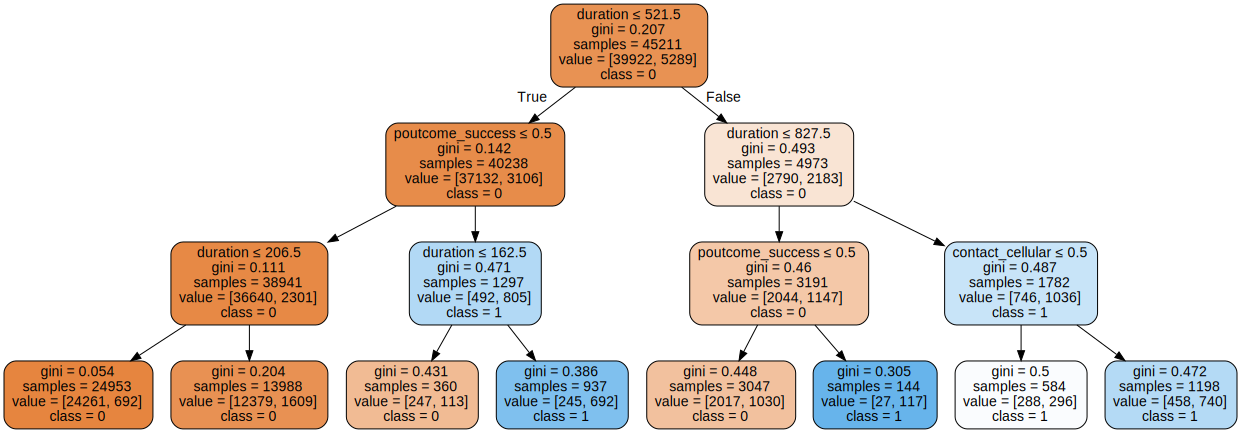

In [87]:
# Disply the tree
from IPython.core.display import display, HTML
display(HTML("<style>text {font-size: 10px;}</style>"))

graph

Next,we are going to use dysfunction to give us the feature importance of the nodes in our decision tree. The decision nodes is the point which features play the biggest role in influencing and what class is drove the perfermance to add performance

In [88]:
from sklearn.base import clone

def imp_df(column_names, importances):
  df = pd.DataFrame({'feature': column_names,
                     'feature_importance': importances}).sort_values('feature_importance', ascending=False).reset_index(drop=True)

  return df

def drop_col_feat_imp(model, X_train, Y_train, random_state=42):
  
  #clone the model to have the exact  same specification as the one initially trained
  model_clone= clone(model)

  #set random_state for comparability
  model_clone.random_state=random_state

  #training and scoring the benchmark model
  model_clone.fit(X_train, Y_train)
  benchmark_score=model_clone.score(X_train, Y_train)

  #list for storing feature importances
  importances=[]

  #iterating over all columns and storing feature importance (difference between benchmark and new model)
  for col in X_train.columns:
    model_clone=clone(model)
    model_clone.random_state=random_state
    model_clone.fit(X_train.drop(col, axis=1), Y_train)
    drop_clone_score=model_clone.score(X_train.drop(col, axis=1), Y_train)
    importances.append(benchmark_score-drop_clone_score)

  importances_df=imp_df(X_train.columns, importances)
  return importances_df

In [89]:
drop_col_feat_imp(dec_tree_model, X_train, Y_train)

,feature,feature_importance
0,poutcome_success,0.011878
1,duration,0.008339
2,age,0.000000
3,education_secondary,0.000000
4,job_unemployed,0.000000
5,job_unknown,0.000000
6,marital_divorced,0.000000
7,marital_married,0.000000
8,marital_single,0.000000
9,education_primary,0.000000


So, we can see an actual effect, there are just two main outcomes, the rest of the things didn't have much of a say, that's becasue of how we build this is the German model.There are not weighted models like linear and logistic regressions, so it only pulled out two here. 

What determines the success of a future campaign here what drove outperfor,ance, which is the question we are asking here, was the outcome of the previous and campaign and the duration of the campaign itself. 

So. poutcome_success and duration are the two things that matter the most using distance is the decision tree.

If we change (max_depth=5), the results will show more complex tree, but the feature shows more informative, so you can start doing deeper and deeper trees and seeing what the features are most important.


We can try different depths and experiment on it to see what you can get. It's a good lesson to do analyze it trace it down for one example and see if it make sense to you. 

That's it for this lesson on predicting and performance. We have seen what drove a performance based on our dataset.